In [8]:
#Predicting Stock Prices using Machine Learning

In [9]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError

#To get rid of warnings
import warnings
warnings.filterwarnings("ignore")

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
train_data = pd.read_csv("C:\\Users\\admin\\Downloads\\data\\Train_dataset_ - Train_Aug10.csv")
train_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [12]:
train_data.info() #Gives Insight about different Attributes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [13]:
#Filling the missing values

In [14]:
train_data.isna().sum() #Gives the number of missing values in each column

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [15]:
#Index vs. Dollar Exchange Rate
pd.crosstab(train_data['Index'],train_data['Dollar Exchange Rate'])

Dollar Exchange Rate,1.0,17.7,74.9
Index,,,
BSE,0,0,1447
JSE,0,1463,0
NSE,0,0,1484
NYSE,1454,0,0
S&P 500,1458,0,0


In [16]:
train_data.loc[train_data["Index"]=="NSE", ["Dollar Exchange Rate"]] = 74.9
train_data.loc[train_data["Index"]=="NYSE", ["Dollar Exchange Rate"]] = 1.0
train_data.loc[train_data["Index"]=="BSE", ["Dollar Exchange Rate"]] = 74.9
train_data.loc[train_data["Index"]=="JSE", ["Dollar Exchange Rate"]] = 17.7
train_data.loc[train_data["Index"]=="S&P 500", ["Dollar Exchange Rate"]] = 1.0

In [17]:
pd.crosstab(train_data['Industry'],train_data['Covid Impact (Beta)'])
#industry vs covid impact

Covid Impact (Beta),-0.43,0.03,0.11,0.23,0.78
Industry,,,,,
Energy,0,0,1431,0,0
Healthcare,0,0,0,0,1359
Information Tech,0,0,0,1389,0
Materials,0,1445,0,0,0
Real Estate,1383,0,0,0,0


In [18]:

train_data.loc[train_data["Industry"]=="Real Estate", ["Covid Impact (Beta)"]] = -0.43
train_data.loc[train_data["Industry"]=="Energy", ["Covid Impact (Beta)"]] = 0.11
train_data.loc[train_data["Industry"]=="Healthcare", ["Covid Impact (Beta)"]] = 0.78
train_data.loc[train_data["Industry"]=="Materials", ["Covid Impact (Beta)"]] = 0.03
train_data.loc[train_data["Industry"]=="Information Tech", ["Covid Impact (Beta)"]] = 0.23

In [19]:
#Index vs. General Index 

pd.crosstab(train_data['Index'],train_data['General Index'])

General Index,3351.28,11270.15,12765.84,38182.08,55722.00
Index,,,,,
BSE,0,0,0,1453,0
JSE,0,0,0,0,1464
NSE,0,1485,0,0,0
NYSE,0,0,1458,0,0
S&P 500,1461,0,0,0,0


In [20]:
train_data.loc[train_data["Index"]=="NSE", ["General Index"]] = 11270.15
train_data.loc[train_data["Index"]=="NYSE", ["General Index"]] = 12765.84
train_data.loc[train_data["Index"]=="BSE", ["General Index"]] = 38182.08
train_data.loc[train_data["Index"]=="JSE", ["General Index"]] = 55722.00
train_data.loc[train_data["Index"]=="S&P 500", ["General Index"]] = 3351.28

In [21]:
#replacing all na values with mean of columns

train_data["Volumes Traded"].fillna(train_data["Volumes Traded"].mean(),inplace = True)
train_data["P/E Ratio"].fillna(train_data["P/E Ratio"].mean(),inplace = True)
train_data["Inventory Turnover"].fillna(train_data["Inventory Turnover"].mean(),inplace = True)
train_data["Tracking Error"].fillna(train_data["Tracking Error"].mean(),inplace = True)
train_data["Put-Call Ratio"].fillna(train_data["Put-Call Ratio"].mean(),inplace = True)

In [22]:
#dropping the remaining data as its not a big number as such
train_data.dropna(inplace=True)
train_data.isna().sum()

Stock Index             0
Index                   0
Industry                0
VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
Stock Price             0
dtype: int64

In [23]:
#missing values handled

In [24]:
#Spliting the Data

 # 1)labell encoding
le =LabelEncoder()

label = le.fit_transform(train_data["Industry"])  #Label encoded the Industry column
label1 = le.fit_transform(train_data["Index"])    #Label encoded the Index column



In [25]:
train_data.drop("Industry",axis=1,inplace=True)
train_data["Industry"] = label
#Dropped the Previous column and added new encoded column for Industry.

train_data.drop("Index",axis=1,inplace=True)
train_data["Index"] = label1
#Dropped the Previous column and added new encoded column for Index.

train_data.drop("Stock Index", axis=1, inplace=True)
#The Stock Index is dropped because its just index and not used to predict anything.

In [26]:
X = train_data.drop("Stock Price", axis =1)
Y = train_data["Stock Price"]

In [27]:
X.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Industry,Index
0,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,4,3
1,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.944722,6.91,2,3
2,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.944722,6.09,2,3
3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,3,0
5,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.150000,5.51,3,0


In [28]:
# Spliting the Data into train and test(Validation) Data 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
x_train.shape, x_test.shape

((5828, 13), (1457, 13))

In [30]:
#Training the model


In [31]:
np.random.seed(36) #Seed to make our results re-producable

model1 = LinearRegression()
model1.fit(x_train,y_train)
model1.score(x_test, y_test)

0.8715725915853768

In [32]:
np.random.seed(36) #Seed to make our results re-producable

model2 = linear_model.Ridge(alpha=20)
model2.fit(x_train,y_train)
model2.score(x_test, y_test)

0.8715793920842696

In [33]:
np.random.seed(42)

model3 = RandomForestRegressor()
model3.fit(x_train,y_train)
model3.score(x_test, y_test)

0.9791289025767353

In [34]:
#Currently our models are :

#model1 : LinearRegression()

#model2 : linear_model.Ridge(alpha=20)

#model3 : RandomForestRegressor()

In [35]:
#Predicting values with our different models
y_pred1 = model1.predict(x_test) #Predicted Values by Model1
y_pred2 = model2.predict(x_test) #Predicted Values by Model2
y_pred3 = model3.predict(x_test) #Predicted Values by Model3

<Axes: >

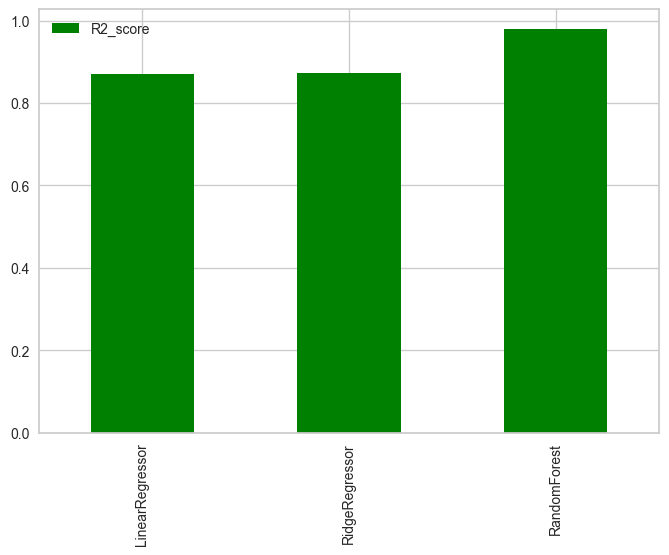

In [36]:
r2_scores = pd.DataFrame(data={"LinearRegressor":r2_score(y_test, y_pred1),
             "RidgeRegressor":r2_score(y_test, y_pred2),
             "RandomForest":r2_score(y_test, y_pred3)}, index = ["R2_score"])
r2_scores.T.plot.bar(color='green')

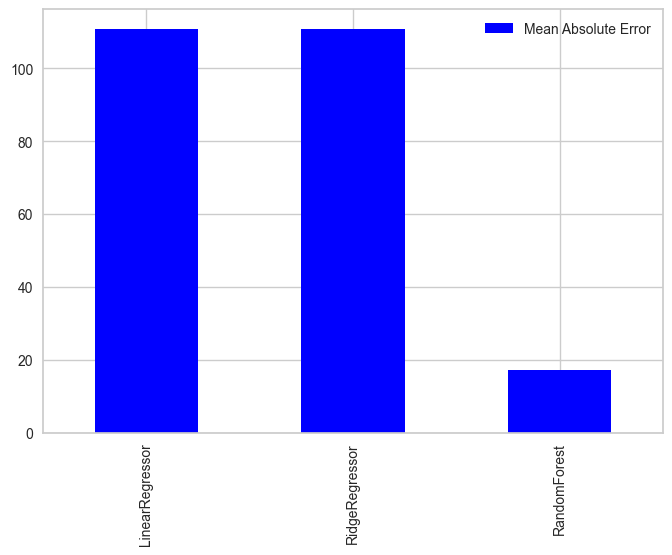

In [37]:
#it can be seen that random forest performs better prediction


#mean absolute error
mae_scores = pd.DataFrame(data={"LinearRegressor":mean_absolute_error(y_test, y_pred1),
             "RidgeRegressor":mean_absolute_error(y_test, y_pred2),
             "RandomForest":mean_absolute_error(y_test, y_pred3)}, index = ["Mean Absolute Error"])
mae_scores.T.plot.bar(color='blue');

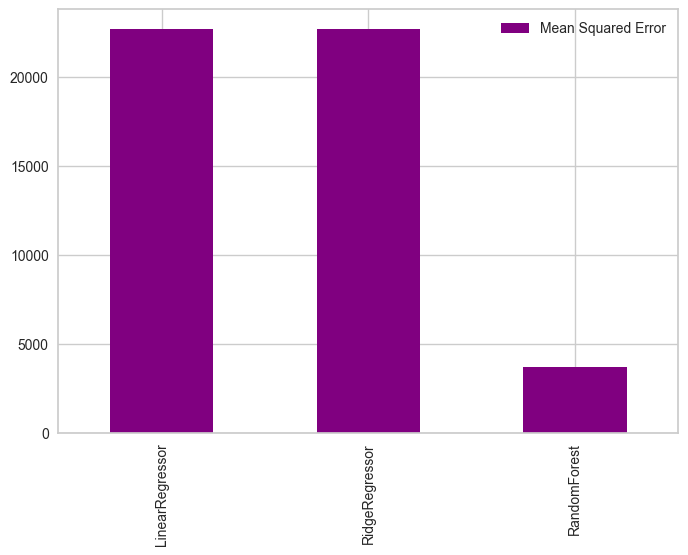

In [38]:
#mean squared error

mse_scores = pd.DataFrame(data={"LinearRegressor":mean_squared_error(y_test, y_pred1),
             "RidgeRegressor":mean_squared_error(y_test, y_pred2),
             "RandomForest":mean_squared_error(y_test, y_pred3)}, index = ["Mean Squared Error"])
mse_scores.T.plot.bar(color='purple');

In [39]:
#evaluating model

model = model3 #RandomForest
y_pred = y_pred3

In [40]:
 #Evaluating Values Manually
#The below is a DataFrame containing the predicted and true value.

In [41]:
values = pd.DataFrame(data={"Predicted":y_pred,"Original":y_test,"Difference":y_pred-y_test})
values.head()

,Predicted,Original,Difference
1111,310.559718,308.666697,1.893021
5820,856.667179,865.351808,-8.684629
6948,127.976999,121.292847,6.684152
5071,715.424773,737.271910,-21.847137
6226,548.789124,545.262090,3.527035


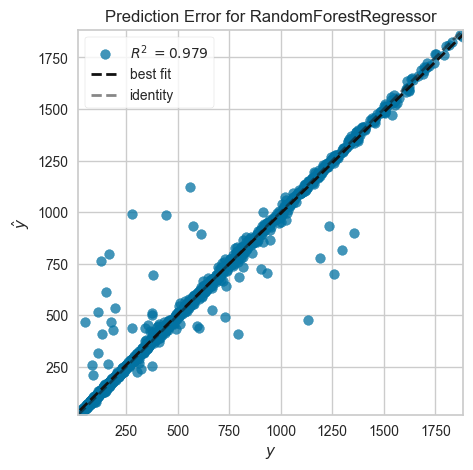

In [42]:
visualizer = PredictionError(model,size=(500,500))

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the validation data
visualizer.poof();

In [43]:
#cross val score

np.random.seed(42)

cross_val_score(model, X, Y, cv=3, scoring=None)

array([0.99152613, 0.94662341, 0.99557742])

In [44]:
#The test data imported below is cleaned and filled in another jupyter notebook.

#It has the same Data Cleaning Steps as we used in this notebook

In [45]:
cleaned_test = pd.read_csv("C:\\Users\\admin\\Downloads\\data\\final_test.csv")
cleaned_test.head()

,Stock Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Industry,Index
0,AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.800000,4.66,3,2
1,AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.860000,6.11,0,1
2,AC3237,567.75,1461.00,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.930000,4.99,2,4
3,AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.090000,1.26,1,2
4,AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.938828,6.18,3,3


In [46]:
np.random.seed(42)
predicted = model.predict(cleaned_test.drop("Stock Index",axis=1))

# Stock Index is not included while predicting because it isnt used for training the model


In [47]:
import os

path = r"C:\Users\admin\Downloads\answer_list\file1.csv"
assert os.path.isfile(path)
with open(path, "r") as f:
    pass

ans = pd.DataFrame(predicted,index=cleaned_test['Stock Index'],columns=["Predicted Values"])
ans.to_csv("path")
ans
# Imported the final Answer as csv file "file_01.csv" as asked in the Question

,Predicted Values
Stock Index,
AC3235,808.563932
AC3236,255.185324
AC3237,1550.640334
AC3238,803.824159
AC3239,267.094905
...,...
AD2734,140.460108
AD2735,564.008513
AD2736,598.049868
